In [1]:
%reset -f
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import geopandas as gpd
import contextily as cx
import matplotlib.colors as colors
%matplotlib inline

In [2]:
# Read-in datafiles
Licor = pd.read_csv('Licor.csv',header = [0],sep=",", parse_dates = [0]);
Airmar_GPS = pd.read_csv('AirMar_GPS.csv',header = [0],sep=",", parse_dates = [0]);
Aeris = pd.read_csv('Aeris.csv',header = [0],sep=",",parse_dates = [0] );
Car_GPS = pd.read_csv('GPS_car.csv',header = [0],sep=",",parse_dates = [0])

In [3]:
#Set the time as index
Licor = Licor.set_index(Licor['UTC']);
Airmar_GPS = Airmar_GPS.set_index(Airmar_GPS['Datetime_UTC'])
Aeris = Aeris.set_index(Aeris['Datetime'])
Car_GPS = Car_GPS.set_index(Car_GPS['date time'])

In [4]:
# Merge the Data based on time series:
merge_data_conc = pd.merge(Licor,Aeris,left_index=True, right_index=True)

# Merge with Car GPS:
Data = pd.merge(merge_data_conc,Car_GPS,left_index=True, right_index=True).rename(columns = 
                                                                                  {'latitude': 'latitude_car',
                                                                                   'longitude': 'longitude_car'})
Data

,UTC,H2O (ppm),CO2 (ppm),CH4 (ppb),Datetime,CH4 (ppm),H2O (ppm)_x,C2H6 (ppb),Latitude,Longitude,N2O (ppm),H2O (ppm)_y,CO (ppm),date time,latitude_car,longitude_car
2023-10-10 19:06:13,2023-10-10 19:06:13,9781.3525,472.06522,2147.2686,2023-10-10 19:06:13,2.20643,11884.8,11.3626,40.816853,-73.953751,0.373606,12528.8,0.604021,2023-10-10 19:06:13,40.816096,-73.954241
2023-10-10 19:06:14,2023-10-10 19:06:14,9778.8672,468.42670,2145.2708,2023-10-10 19:06:14,2.20784,11890.1,11.5976,40.816921,-73.953697,0.373320,12555.5,0.585878,2023-10-10 19:06:14,40.816170,-73.954187
2023-10-10 19:06:15,2023-10-10 19:06:15,9775.1719,478.06290,2147.1011,2023-10-10 19:06:15,2.20443,11894.2,11.1147,40.816990,-73.953644,0.371557,12548.4,0.571674,2023-10-10 19:06:15,40.816241,-73.954134
2023-10-10 19:06:19,2023-10-10 19:06:19,9791.6963,464.17505,2156.9204,2023-10-10 19:06:19,2.17987,11899.3,10.2237,40.817200,-73.953491,0.362659,12553.6,0.475422,2023-10-10 19:06:19,40.816528,-73.953922
2023-10-10 19:06:20,2023-10-10 19:06:20,9801.6689,463.93985,2160.8833,2023-10-10 19:06:20,2.18159,11886.5,10.3468,40.817268,-73.953445,0.360265,12551.8,0.452519,2023-10-10 19:06:20,40.816600,-73.953868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 21:28:02,2023-10-10 21:28:02,8613.7119,457.25912,2078.5359,2023-10-10 21:28:02,2.13261,10208.6,10.9377,40.811172,-73.963814,0.342245,10587.1,0.245305,2023-10-10 21:28:02,40.811153,-73.963775
2023-10-10 21:28:03,2023-10-10 21:28:03,8613.5049,457.94287,2078.5405,2023-10-10 21:28:03,2.13439,10213.3,10.8689,40.811172,-73.963814,0.342387,10596.7,0.245887,2023-10-10 21:28:03,40.811153,-73.963775
2023-10-10 21:28:04,2023-10-10 21:28:04,8614.7441,458.72827,2078.5566,2023-10-10 21:28:04,2.13336,10217.0,10.7956,40.811169,-73.963814,0.342654,10617.1,0.246055,2023-10-10 21:28:04,40.811153,-73.963775
2023-10-10 21:28:05,2023-10-10 21:28:05,8615.8467,458.09589,2078.4033,2023-10-10 21:28:05,2.13360,10214.8,10.7275,40.811169,-73.963821,0.342385,10575.3,0.246233,2023-10-10 21:28:05,40.811153,-73.963775


Text(0.5, 1.0, 'Licor and Aeris CH4 ')

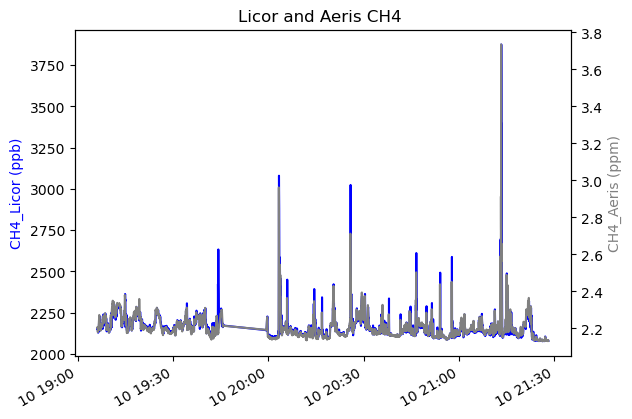

In [5]:
# Check the merge
# Check if the data merge is working:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Data['CH4 (ppb)'].plot(ax = ax, label = 'CH4_Licor (ppb)',color = 'blue',fontsize = 10);
Data['CH4 (ppm)'].plot(ax = ax2, label = 'CH4_Aeris (ppm)',color = 'grey',fontsize = 10);

ax.set_ylabel('CH4_Licor (ppb)', color = 'blue',fontsize = 10)
ax2.set_ylabel('CH4_Aeris (ppm)',color = 'grey',fontsize = 10)
plt.title('Licor and Aeris CH4 ')

3874.8899


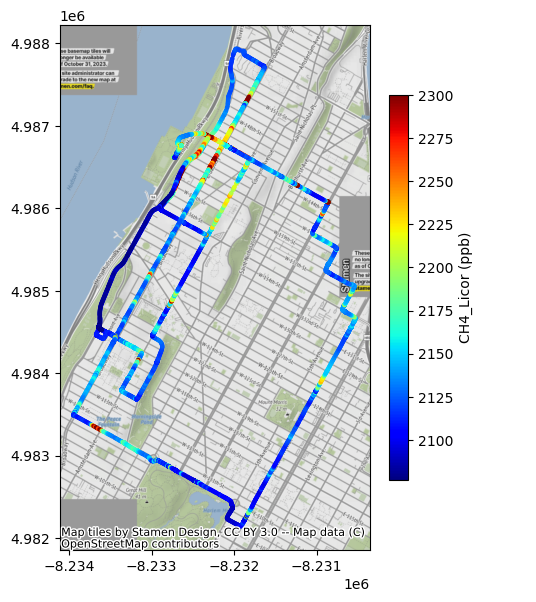

In [6]:
# Map for CH4
merge_gdp = gpd.GeoDataFrame(Data, geometry = gpd.points_from_xy(Data['longitude_car'],Data['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
c= merge_gdp['CH4 (ppb)']
norm = colors.NoNorm()#Normalize(vmin=merge_gdp['CH4 (ppb)'].min(), vmax = merge_gdp['CH4 (ppb)'].max() ) 
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'CH4 (ppb)',ax = ax, legend = True,cmap = 'jet',markersize = 5,vmax= 2300,
                                        legend_kwds={'shrink': 0.5,'label':'CH4_Licor (ppb)'},
                                       )
a = cx.add_basemap(ax)
print(c.max())

3874.8899


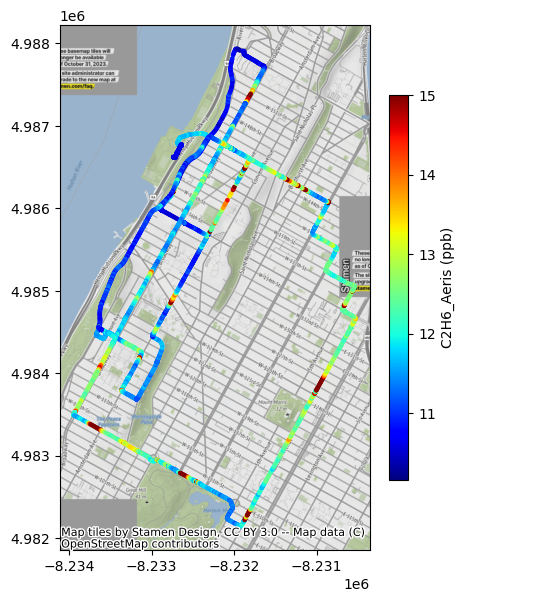

In [7]:
# Map for C2H6:
merge_gdp = gpd.GeoDataFrame(Data, geometry = gpd.points_from_xy(Data['longitude_car'],Data['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
c= merge_gdp['CH4 (ppb)']
print(c.max()) # Show the Maximum level
# Plot:
norm = colors.NoNorm()#Normalize(vmin=merge_gdp['CH4 (ppb)'].min(), vmax = merge_gdp['CH4 (ppb)'].max() ) 
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'C2H6 (ppb)',ax = ax, legend = True,cmap = 'jet',markersize = 5,vmax = 15,
                                        legend_kwds={'shrink': 0.5,'label':'C2H6_Aeris (ppb)'},
                                       )
a = cx.add_basemap(ax)


In [8]:
# Pick only the data you want based on time:
Data_Driving = Data[(Data.index>'2023-10-10 19:00:00')&(Data.index<'2023-10-10 19:30:00')]

2362.647


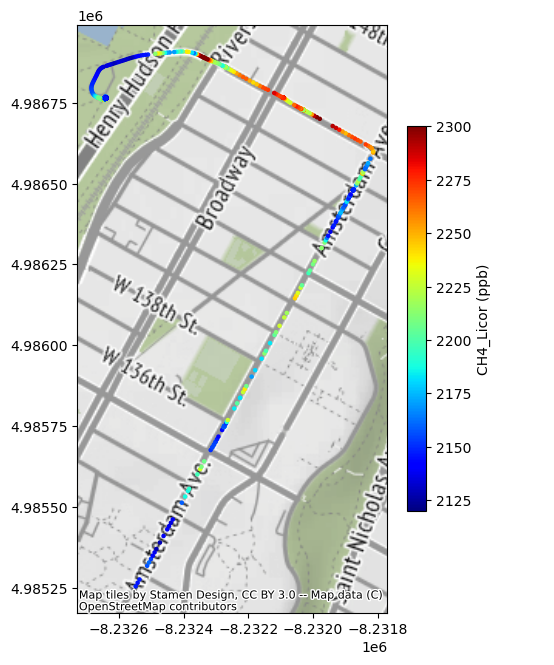

In [9]:
# Sampling the road: 3 pm local (19:00 UTC) to 3:25 pm (19:25 UTC)


merge_gdp = gpd.GeoDataFrame(Data_Driving, geometry = gpd.points_from_xy(Data_Driving['longitude_car'],Data_Driving['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
c= merge_gdp['CH4 (ppb)']
norm = colors.NoNorm()#Normalize(vmin=merge_gdp['CH4 (ppb)'].min(), vmax = merge_gdp['CH4 (ppb)'].max() ) 
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'CH4 (ppb)',ax = ax, legend = True,cmap = 'jet',markersize = 5,vmax = 2300,
                                        legend_kwds={'shrink': 0.5,'label':'CH4_Licor (ppb)'},
                                       )
a = cx.add_basemap(ax, zoom = 15)
print(c.max())



In [10]:
# Walking Data
Data_Walking = Licor[(Licor.index>'2023-10-10 19:45:00')&(Licor.index<'2023-10-10 19:53:00')]
Aeris_Walking = Aeris[(Aeris.index>'2023-10-10 19:45:00')&(Aeris.index<'2023-10-10 19:53:00')]

Text(0.5, 1.0, 'Walking Samlping ')

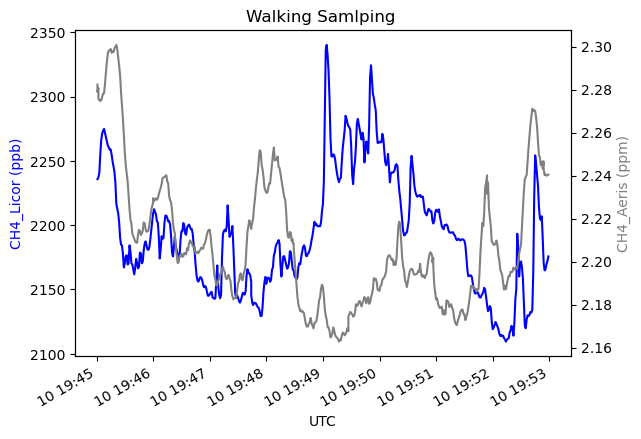

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Data_Walking['CH4 (ppb)'].plot(ax = ax, label = 'CH4_Licor (ppb)',color = 'blue',fontsize = 10);
Aeris_Walking['CH4 (ppm)'].plot(ax = ax2, label = 'CH4 Aeris (ppm)', color = 'grey',fontsize = 10)
ax.set_ylabel('CH4_Licor (ppb)', color = 'blue',fontsize = 10)
ax2.set_ylabel('CH4_Aeris (ppm)', color = 'grey',fontsize = 10)

plt.title('Walking Samlping ')

In [12]:
# Apply Background Calculation
Rolling_Window = 15 # in mins
rolling_factor = 60*Rolling_Window
Data['CH4_Licor bg 1st {}min'.format(Rolling_Window)
               ] =  Data['CH4 (ppb)'
                                   ].rolling(rolling_factor,center = True, min_periods =1).quantile(0.05)

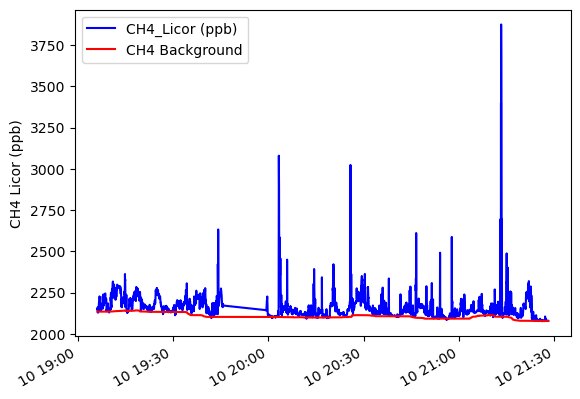

In [13]:
fig, ax = plt.subplots()
Data['CH4 (ppb)'].plot(ax = ax, label = 'CH4_Licor (ppb)',color = 'blue',fontsize = 10);
Data['CH4_Licor bg 1st {}min'.format(Rolling_Window)
               ].plot(ax = ax, label = 'CH4 Background', color = 'red',fontsize = 10)
Data['CH4 Licor Enhance'] = Data['CH4 (ppb)'] - Data['CH4_Licor bg 1st {}min'.format(Rolling_Window)]
plt.ylabel('CH4 Licor (ppb)')
plt.legend()


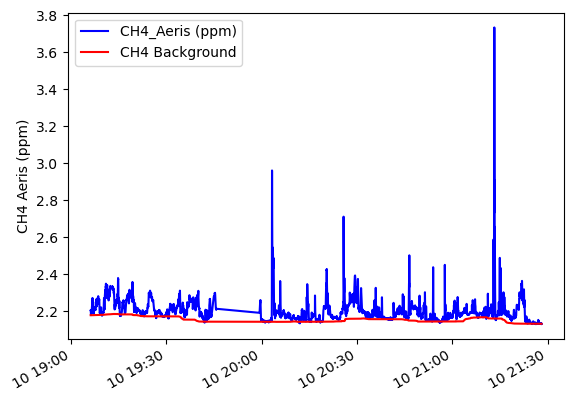

In [14]:
# CH4 Aeris:
Data['CH4_Aeris bg 1st {}min'.format(Rolling_Window)
               ] =  Data['CH4 (ppm)'
                                   ].rolling(rolling_factor,center = True, min_periods =1).quantile(0.05)
fig, ax = plt.subplots()
Data['CH4 (ppm)'].plot(ax = ax, label = 'CH4_Aeris (ppm)',color = 'blue',fontsize = 10);
Data['CH4_Aeris bg 1st {}min'.format(Rolling_Window)
               ].plot(ax = ax, label = 'CH4 Background', color = 'red',fontsize = 10)
plt.ylabel('CH4 Aeris (ppm)')
plt.legend()
Data['CH4 Aeris Enhance'] = Data['CH4 (ppm)'] - Data['CH4_Aeris bg 1st {}min'.format(Rolling_Window)]

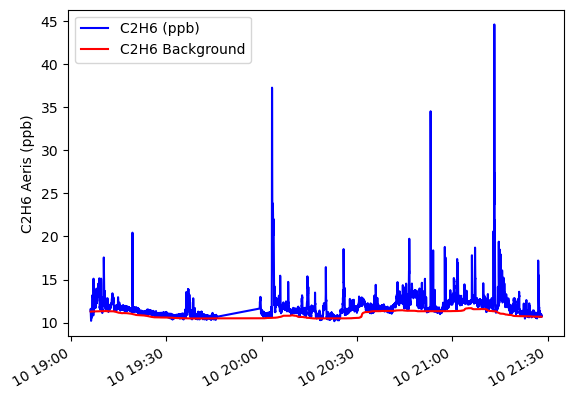

In [15]:
## Enhancement for C2H6:
Data['C2H6 bg 1st {}min'.format(Rolling_Window)
               ] =  Data['C2H6 (ppb)'
                                   ].rolling(rolling_factor,center = True, min_periods =1).quantile(0.05)
fig, ax = plt.subplots()
Data['C2H6 (ppb)'].plot(ax = ax, label = 'C2H6 (ppb)',color = 'blue',fontsize = 10);
plt.ylabel('C2H6 (ppb)')
Data['C2H6 bg 1st {}min'.format(Rolling_Window)
               ].plot(ax = ax, label = 'C2H6 Background', color = 'red',fontsize = 10)
plt.ylabel('C2H6 Aeris (ppb)')
plt.legend()
Data['C2H6 Enhance'] = Data['C2H6 (ppb)'] - Data['C2H6 bg 1st {}min'.format(Rolling_Window)]

0.8171819999999999
26.727330000000002


Text(0.5, 1.0, 'Street Samlping near Barnard ')

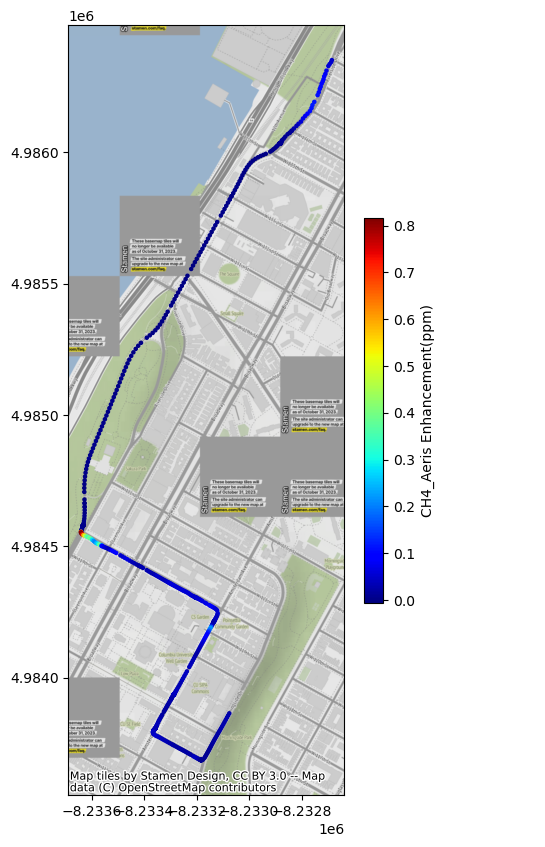

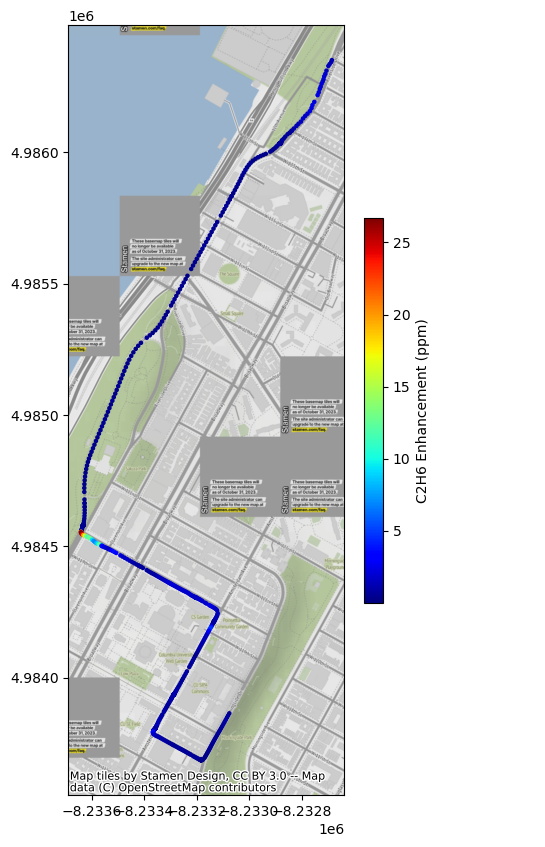

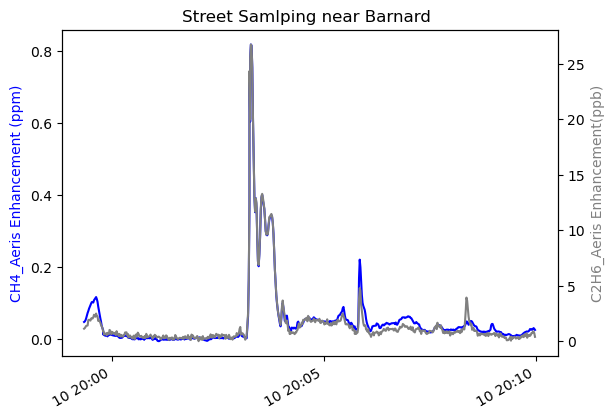

In [16]:
# Pick a time where you would like to see the co-peak:
Data_cut = Data[(Data.index>'2023-10-10 19:50:00')&(Data.index<'2023-10-10 20:10:00')]

# MAP for CH4:
merge_gdp = gpd.GeoDataFrame(Data_cut, geometry = gpd.points_from_xy(Data_cut['longitude_car'],Data_cut['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
c= merge_gdp['CH4 Aeris Enhance']
norm = colors.NoNorm()#Normalize(vmin=merge_gdp['CH4 (ppb)'].min(), vmax = merge_gdp['CH4 (ppb)'].max() ) 
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'CH4 Aeris Enhance',ax = ax, legend = True,cmap = 'jet',markersize = 5,
                                        legend_kwds={'shrink': 0.5,'label':'CH4_Aeris Enhancement(ppm)'},)
a = cx.add_basemap(ax)
print(c.max())

## Map for C2H6:

merge_gdp = gpd.GeoDataFrame(Data_cut, geometry = gpd.points_from_xy(Data_cut['longitude_car'],Data_cut['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
c= merge_gdp['C2H6 Enhance']
norm = colors.NoNorm()#Normalize(vmin=merge_gdp['CH4 (ppb)'].min(), vmax = merge_gdp['CH4 (ppb)'].max() ) 
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'C2H6 Enhance',ax = ax, legend = True,cmap = 'jet',markersize = 5,
                                        legend_kwds={'shrink': 0.5,'label':'C2H6 Enhancement (ppm)'},)
a = cx.add_basemap(ax)
print(c.max())

# Plot the CH4 and C2H6:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Data_cut['CH4 Aeris Enhance'].plot(ax = ax, label = 'CH4_Aeris (ppm)',color = 'blue',fontsize = 10);
Data_cut['C2H6 Enhance'].plot(ax = ax2, label = 'C2H6 Aeris (ppb)', color = 'grey',fontsize = 10)
ax.set_ylabel('CH4_Aeris Enhancement (ppm)', color = 'blue',fontsize = 10)
ax2.set_ylabel('C2H6_Aeris Enhancement(ppb)', color = 'grey',fontsize = 10)
plt.title('Street Samlping near Barnard ')